<a href="https://colab.research.google.com/github/yujiunzou/BA820-Unsupervised-ML-Project/blob/main/Pet_Cats_UK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA - Pet Cats UK

Team ID: B1 Team 3

Team Members: Kean Zhu, Yihui(Irene) Tang, Yu-Jiun(Janice) Zou, Tzu-Jen(Stephanie) Chen.

##0.Load and Explore the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

%matplotlib inline

In [ ]:
pet_cats = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2023/2023-01-31/cats_uk.csv')

print(f"Dataset size: {pet_cats.shape}")
print("\n Cats data (events):")

display(pet_cats.head())

Dataset size: (18215, 11)

 Cats data (events):


,tag_id,event_id,visible,timestamp,location_long,location_lat,ground_speed,height_above_ellipsoid,algorithm_marked_outlier,manually_marked_outlier,study_name
0,Ares,3395610551,True,2017-06-24T01:03:57Z,-5.113851,50.170315,684,154.67,False,False,Pet Cats United Kingdom
1,Ares,3395610552,True,2017-06-24T01:11:20Z,-5.113851,50.170315,936,154.67,False,False,Pet Cats United Kingdom
2,Ares,3395610553,True,2017-06-24T02:58:16Z,-5.113730,50.169876,2340,81.35,False,False,Pet Cats United Kingdom
3,Ares,3395610554,True,2017-06-24T03:01:26Z,-5.113774,50.169827,0,67.82,False,False,Pet Cats United Kingdom
4,Ares,3395610555,True,2017-06-24T03:51:58Z,-5.114247,50.170139,4896,118.03,False,False,Pet Cats United Kingdom


In [ ]:
pet_cats_rf = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2023/2023-01-31/cats_uk_reference.csv')

print(f"Dataset size: {pet_cats_rf.shape}")
print("\n Cats reference data (cat's attribute):")

display(pet_cats_rf.head())

Dataset size: (101, 16)

 Cats reference data (cat's attribute):


,tag_id,animal_id,animal_taxon,deploy_on_date,deploy_off_date,hunt,prey_p_month,animal_reproductive_condition,animal_sex,hrs_indoors,n_cats,food_dry,food_wet,food_other,study_site,age_years
0,Tommy-Tag,Tommy,Felis catus,2017-06-03T01:02:09Z,2017-06-10T02:10:52Z,True,12.5,Neutered,m,12.5,2,True,True,False,UK,11.0
1,Athena,Athena,Felis catus,2017-06-24T01:02:13Z,2017-06-30T23:59:32Z,True,3.0,Spayed,f,7.5,2,True,True,False,UK,3.0
2,Ares,Ares,Felis catus,2017-06-24T01:03:57Z,2017-06-30T23:58:01Z,NaN,0.0,Neutered,m,7.5,2,True,True,False,UK,3.0
3,Lola,Lola,Felis catus,2017-06-24T01:18:49Z,2017-06-30T09:04:40Z,True,3.0,Spayed,f,17.5,1,True,True,False,UK,10.0
4,Maverick,Maverick,Felis catus,2017-06-25T01:04:35Z,2017-07-03T09:10:07Z,True,3.0,Neutered,m,12.5,1,True,True,True,UK,7.0


##1.Data Overview

In [ ]:
pet_cats.info()
pet_cats.isna().sum().sort_values(ascending=False)
unique_cat = pet_cats['tag_id'].nunique()
print(f'There are {unique_cat} unique cats in the dataset.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18215 entries, 0 to 18214
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tag_id                    18215 non-null  object 
 1   event_id                  18215 non-null  int64  
 2   visible                   18215 non-null  bool   
 3   timestamp                 18215 non-null  object 
 4   location_long             18215 non-null  float64
 5   location_lat              18215 non-null  float64
 6   ground_speed              18215 non-null  int64  
 7   height_above_ellipsoid    18215 non-null  float64
 8   algorithm_marked_outlier  18215 non-null  bool   
 9   manually_marked_outlier   18215 non-null  bool   
 10  study_name                18215 non-null  object 
dtypes: bool(3), float64(3), int64(2), object(3)
memory usage: 1.2+ MB
There are 101 unique cats in the dataset.


In [ ]:
pet_cats_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tag_id                         101 non-null    object 
 1   animal_id                      101 non-null    object 
 2   animal_taxon                   101 non-null    object 
 3   deploy_on_date                 101 non-null    object 
 4   deploy_off_date                101 non-null    object 
 5   hunt                           92 non-null     object 
 6   prey_p_month                   101 non-null    float64
 7   animal_reproductive_condition  98 non-null     object 
 8   animal_sex                     101 non-null    object 
 9   hrs_indoors                    101 non-null    float64
 10  n_cats                         101 non-null    int64  
 11  food_dry                       101 non-null    bool   
 12  food_wet                       101 non-null    boo

The dataset contains 18,125 movement events from 101 unique cats

##2.Checking for Missing Values and Duplicates

###2.1 cats_uk dataset

In [ ]:
# missing
missing = pet_cats.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing columns:")
display(missing)

# duplicates
print("Duplicate event_id:", pet_cats["event_id"].duplicated().sum())
print("Duplicate (tag_id, timestamp):", pet_cats.duplicated(subset=["tag_id","timestamp"]).sum())

# range checks
pet_cats.describe()

Missing columns:


,0


Duplicate event_id: 0
Duplicate (tag_id, timestamp): 0


,event_id,location_long,location_lat,ground_speed,height_above_ellipsoid
count,1.821500e+04,18215.000000,18215.000000,18215.000000,18215.000000
mean,3.618912e+09,-4.988242,50.296238,1911.484381,103.648265
std,1.934048e+08,0.301499,0.158353,4592.574178,245.705665
min,3.395611e+09,-5.758854,50.103519,0.000000,-550.070000
25%,3.459216e+09,-5.157051,50.153644,396.000000,48.870000
50%,3.544858e+09,-5.073365,50.236397,1080.000000,80.920000
75%,3.716220e+09,-4.795648,50.428098,2232.000000,119.430000
max,4.149498e+09,-4.208614,50.882217,277092.000000,8388.260000


The dataset contains no missing values or duplicate records.

Summary statistics reveal that strong skewness and extreme values in movement-related variable suchs as gound speed and height, reflecting the noisy and heterogneous of high-frequency tracking data.

Given that each contributes many repeated event-level observations, aggregation at the cat level is necessary to mitigate the influence of extreme values and unequal counts, enabling comparison of behavioral patterns across individuals.

###2.2 cats_uk_reference dataset

In [ ]:
# missing
missing = pet_cats_rf.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing columns:")
display(missing)

# duplicates
print("Duplicate tag_id:", pet_cats_rf["tag_id"].duplicated().sum())

# range checks
pet_cats_rf.describe()

Missing columns:


,0
food_other,10
hunt,9
animal_reproductive_condition,3
age_years,1


Duplicate tag_id: 0


,prey_p_month,hrs_indoors,n_cats,age_years
count,101.000000,101.000000,101.000000,100.000000
mean,3.742574,11.856436,2.079208,5.420000
std,4.831467,5.227971,0.996827,3.384994
min,0.000000,2.500000,1.000000,0.000000
25%,0.500000,7.500000,1.000000,3.000000
50%,3.000000,12.500000,2.000000,5.000000
75%,3.000000,17.500000,3.000000,8.000000
max,17.500000,22.500000,4.000000,16.000000


The reference dataset contains no duplicate cat IDs and small number of missing values.

Each records represents a single cat with demographic and lifestyle attributes, making this dataset naturally aligned with further cat-level analysis.

In [ ]:
pet_cats_rf[['hunt', 'animal_reproductive_condition', 'food_other']]=(pet_cats_rf[['hunt', 'animal_reproductive_condition', 'food_other']].fillna('Unknown'))

median_age_rf = pet_cats_rf['age_years'].median()
pet_cats_rf['age_years'] = pet_cats_rf['age_years'].fillna(median_age_rf)

print("Missing values in pet_cats_rf after handling:")
display(pet_cats_rf.isna().sum())

Missing values in pet_cats_rf after handling:


,0
tag_id,0
animal_id,0
animal_taxon,0
deploy_on_date,0
deploy_off_date,0
hunt,0
prey_p_month,0
animal_reproductive_condition,0
animal_sex,0
hrs_indoors,0


To handle missing values, categorical attributes are imputed with "unknown", while age is imputed using the median.

# 3. Variable Exploration


###3.1 Aggregate data by each cat

In [ ]:
# spatial movement summary
spatial_summary = (pet_cats.groupby("tag_id")
.agg(lat_range=("location_lat", lambda x: x.max() - x.min()),
     lon_range=("location_long", lambda x: x.max() - x.min()))).reset_index()


spatial_summary["area_proxy"] = spatial_summary["lat_range"] * spatial_summary["lon_range"]
spatial_summary.describe()
spatial_summary

,tag_id,lat_range,lon_range,area_proxy
0,Abba-Tag,0.003963,0.010782,0.000043
1,Alfie-Tag,0.004066,0.012550,0.000051
2,Amber-Tag,0.030289,0.040155,0.001216
3,Ares,0.002487,0.003378,0.000008
4,Athena,0.002319,0.003988,0.000009
...,...,...,...,...
96,Tommy-Tag,0.002044,0.003412,0.000007
97,Whiskey-Tag,0.002888,0.004207,0.000012
98,Wilfred-Tag,0.002739,0.008034,0.000022
99,Winnie-Tag,0.003204,0.003002,0.000010


We aggregate location data by cat and compute the range of latitude and longitude for each cat. The products of these ranges (area_proxy) is used as a measure of how widely each cat moves.

In [ ]:
cat_agg = (pet_cats.groupby("tag_id").agg(n_events=("event_id", "count"),avg_speed=("ground_speed", "mean"), max_speed=("ground_speed", "max"), speed_std=("ground_speed", "std"), avg_height=("height_above_ellipsoid", "mean")) .reset_index())

cat_agg.describe()

,n_events,avg_speed,max_speed,speed_std,avg_height
count,101.000000,101.000000,101.000000,101.000000,101.000000
mean,180.346535,2035.621811,25251.683168,3059.787448,101.349403
std,146.280582,614.770344,32892.958836,2061.335197,50.700754
min,12.000000,758.325260,6264.000000,1185.820205,26.971138
25%,100.000000,1625.684211,12780.000000,2008.264424,61.034770
50%,155.000000,1903.411765,18720.000000,2537.062946,88.547033
75%,214.000000,2292.631579,26316.000000,3381.718040,132.478382
max,963.000000,5052.000000,277092.000000,14088.085439,292.072586


After aggregating the data at the cat level, there are large difference across cats in the number of events, average speed, and movement varability, indicating that cats exhibit diverse movement behaviors.

###3.2 Distribution

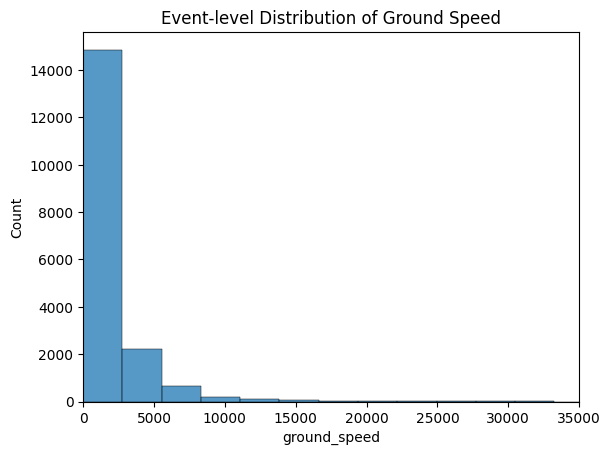

In [ ]:
# Distribution of ground_speed
sns.histplot(pet_cats["ground_speed"], bins=100)
plt.xlim(0, 35000)
plt.title("Event-level Distribution of Ground Speed")
plt.show()

GAt the event-level, ground speed is highly right-skewed, with most observations concentrated at low values and a small number of extreme speeds. This reflect noisy, time-specific movement events and support that further aggregation at the cat-level average speed.

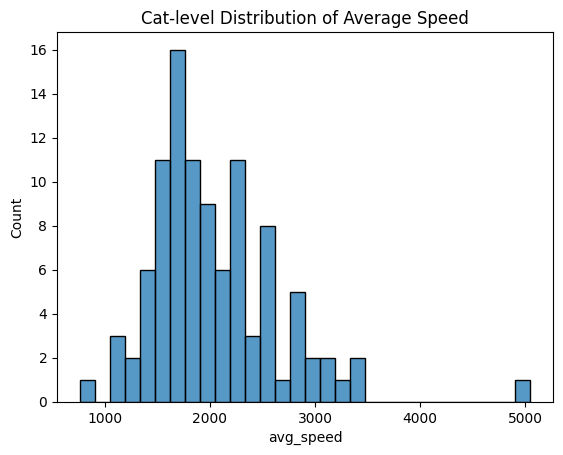

In [ ]:
# Distribution of average_speed
sns.histplot(cat_agg["avg_speed"], bins=30)
plt.title("Cat-level Distribution of Average Speed")
plt.show()

The cat-level distribution of average speed suggests that cats differ in their typical activity levels, with most cats showing moderate movement. This motivate further analysis to identigy potential behavioral segments and to explore how these actitvity features relate to other cat attributes.

In [ ]:
# Distribution of Hourly Movement Pattern
pet_cats["timestamp"] = pd.to_datetime(pet_cats["timestamp"])
pet_cats["hour"] = pet_cats["timestamp"].dt.hour
hourly_speed = (pet_cats.groupby("hour")["ground_speed"].mean())

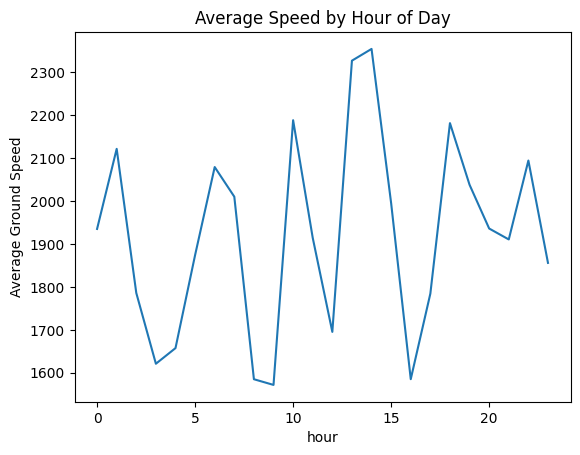

In [ ]:
hourly_speed.plot(kind="line", title="Average Speed by Hour of Day")
plt.ylabel("Average Ground Speed")
plt.show()

Average movement speed varies by hour of day, suggesting that cats tend to show higher average movement speeds at certain hours of the day, while activity is lower during other periods. Raising the possibility that daily activity patterns may differ by cat-level attributes such as indoor time or age.

# 4. Merge cats_uk & cats_uk_reference dataset
Combine cat attributes with movement pattern

In [ ]:
#event-level dataset
event_movement = pet_cats.merge(pet_cats_rf,on="tag_id",how="left")
event_movement.info()
display(event_movement.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18215 entries, 0 to 18214
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tag_id                         18215 non-null  object 
 1   event_id                       18215 non-null  int64  
 2   visible                        18215 non-null  bool   
 3   timestamp                      18215 non-null  object 
 4   location_long                  18215 non-null  float64
 5   location_lat                   18215 non-null  float64
 6   ground_speed                   18215 non-null  int64  
 7   height_above_ellipsoid         18215 non-null  float64
 8   algorithm_marked_outlier       18215 non-null  bool   
 9   manually_marked_outlier        18215 non-null  bool   
 10  study_name                     18215 non-null  object 
 11  animal_id                      18215 non-null  object 
 12  animal_taxon                   18215 non-null 

,tag_id,event_id,visible,timestamp,location_long,location_lat,ground_speed,height_above_ellipsoid,algorithm_marked_outlier,manually_marked_outlier,...,prey_p_month,animal_reproductive_condition,animal_sex,hrs_indoors,n_cats,food_dry,food_wet,food_other,study_site,age_years
0,Ares,3395610551,True,2017-06-24T01:03:57Z,-5.113851,50.170315,684,154.67,False,False,...,0.0,Neutered,m,7.5,2,True,True,False,UK,3.0
1,Ares,3395610552,True,2017-06-24T01:11:20Z,-5.113851,50.170315,936,154.67,False,False,...,0.0,Neutered,m,7.5,2,True,True,False,UK,3.0
2,Ares,3395610553,True,2017-06-24T02:58:16Z,-5.113730,50.169876,2340,81.35,False,False,...,0.0,Neutered,m,7.5,2,True,True,False,UK,3.0
3,Ares,3395610554,True,2017-06-24T03:01:26Z,-5.113774,50.169827,0,67.82,False,False,...,0.0,Neutered,m,7.5,2,True,True,False,UK,3.0
4,Ares,3395610555,True,2017-06-24T03:51:58Z,-5.114247,50.170139,4896,118.03,False,False,...,0.0,Neutered,m,7.5,2,True,True,False,UK,3.0


This merge creates an event-level dataset by attaching cat-level attributes to each movement event.


In [ ]:
#cat-level dataset
cat_movement = pet_cats.groupby("tag_id").agg(avg_speed=("ground_speed","mean"),
                          max_speed=("ground_speed","max"),
                          speed_std=("ground_speed","std"),
                          n_events=("event_id","count"),
                          avg_height=("height_above_ellipsoid","mean")).reset_index()


cat_movement = cat_movement.merge(spatial_summary[['tag_id','area_proxy']], on= 'tag_id', how= 'left')
display(cat_movement.head(3))

cat_merge = cat_movement.merge(pet_cats_rf, on="tag_id", how= "left")
display(cat_merge.head(3))

,tag_id,avg_speed,max_speed,speed_std,n_events,avg_height,area_proxy
0,Abba-Tag,1603.951807,13968,2149.160017,83,177.981566,0.000043
1,Alfie-Tag,1931.679144,14652,2413.262206,187,82.725668,0.000051
2,Amber-Tag,1967.614679,21888,2602.831283,218,56.305917,0.001216


,tag_id,avg_speed,max_speed,speed_std,n_events,avg_height,area_proxy,animal_id,animal_taxon,deploy_on_date,...,prey_p_month,animal_reproductive_condition,animal_sex,hrs_indoors,n_cats,food_dry,food_wet,food_other,study_site,age_years
0,Abba-Tag,1603.951807,13968,2149.160017,83,177.981566,0.000043,Abba,Felis catus,2017-09-25T01:19:26Z,...,3.0,Spayed,f,7.5,2,True,False,False,UK,3.0
1,Alfie-Tag,1931.679144,14652,2413.262206,187,82.725668,0.000051,Alfie,Felis catus,2017-10-23T01:03:54Z,...,3.0,Neutered,m,7.5,2,True,True,True,UK,3.0
2,Amber-Tag,1967.614679,21888,2602.831283,218,56.305917,0.001216,Amber,Felis catus,2017-07-28T01:03:24Z,...,3.0,NaN,f,7.5,4,True,True,True,UK,4.0


We first aggregate movement records to construct cat-level behavioral features.
We then merge these features with static cat attributes to support interpretation and exploratory analysis.


In [ ]:
cat_merge.describe()

,avg_speed,max_speed,speed_std,n_events,avg_height,area_proxy,prey_p_month,hrs_indoors,n_cats,age_years
count,101.000000,101.000000,101.000000,101.000000,101.000000,1.010000e+02,101.000000,101.000000,101.000000,101.000000
mean,2035.621811,25251.683168,3059.787448,180.346535,101.349403,4.746304e-03,3.742574,11.856436,2.079208,5.415842
std,614.770344,32892.958836,2061.335197,146.280582,50.700754,3.212340e-02,4.831467,5.227971,0.996827,3.368285
min,758.325260,6264.000000,1185.820205,12.000000,26.971138,8.643000e-07,0.000000,2.500000,1.000000,0.000000
25%,1625.684211,12780.000000,2008.264424,100.000000,61.034770,9.618408e-06,0.500000,7.500000,1.000000,3.000000
50%,1903.411765,18720.000000,2537.062946,155.000000,88.547033,2.761891e-05,3.000000,12.500000,2.000000,5.000000
75%,2292.631579,26316.000000,3381.718040,214.000000,132.478382,1.166503e-04,3.000000,17.500000,3.000000,8.000000
max,5052.000000,277092.000000,14088.085439,963.000000,292.072586,3.011279e-01,17.500000,22.500000,4.000000,16.000000


#5. Variable Exploration of Merged Dataset

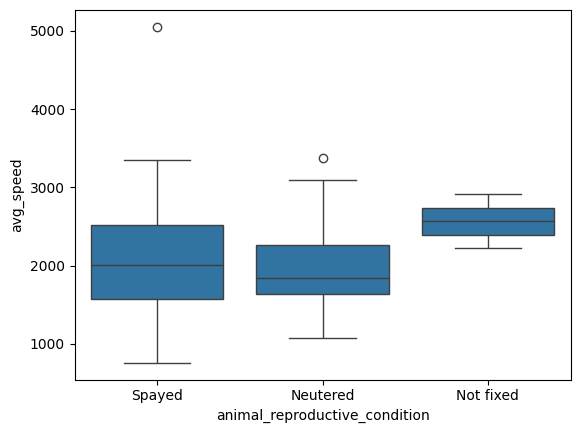

,avg_speed
animal_reproductive_condition,
Neutered,1966.189182
Not fixed,2569.000000
Spayed,2108.972504


In [ ]:
sns.boxplot(data= cat_merge, x= 'animal_reproductive_condition', y='avg_speed')
plt.show()

cat_merge.groupby("animal_reproductive_condition")["avg_speed"].mean()

The results that unfixed cats tend to have higher average movement speeds than neutered or spayed cats, this pattern may reflect underlying differences in ages or lifestyle, which motivate us with further investigation.

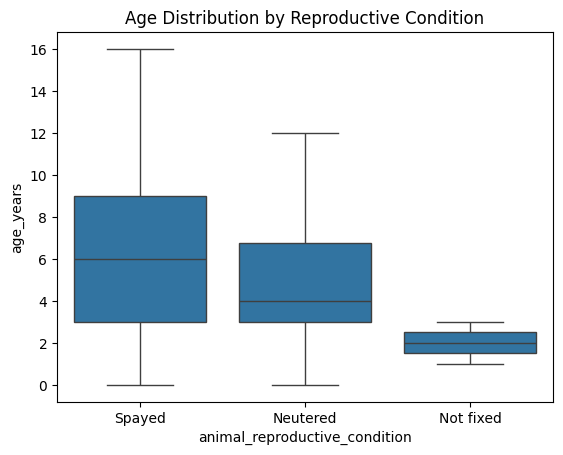

In [ ]:
sns.boxplot(data=cat_merge, x="animal_reproductive_condition",y="age_years")
plt.title("Age Distribution by Reproductive Condition")
plt.show()


The age distribution differs substantially across reproductive conditions. Unfixed cats tend to be much younger that neutered or spayed cats, suggesting that age may partially explain the higher activity levels among unfixed cats.

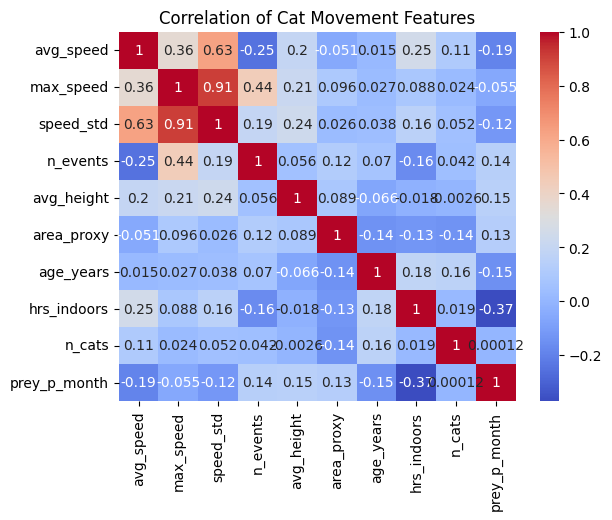

In [ ]:
correlation_movement = cat_merge[["avg_speed", "max_speed", "speed_std", "n_events","avg_height", "area_proxy",
                    "age_years", "hrs_indoors", "n_cats", "prey_p_month"]].corr()
sns.heatmap(correlation_movement, annot=True, cmap='coolwarm')

plt.title('Correlation of Cat Movement Features')
plt.show()

This heatmap shows the correlations among cat-level movement features, where each observation represents one cat.


*   max_speed & speed_std(0.91): Highly correlated, indicating substantial redundancy between these two features.
*   avg_speed & speed_std(0.63): Cats with higher average speed also tend to exhibit greater variability in movement, suggesting that higher activity levels are associated with more irregular movement patterns.

* avg_speed & hrs_indoors(-0.25): Average speed is negatively correlated with hours spent indoors, indicating that cats spending more time indoors tend to be less active.
* area_proxy & avg_speed(-0.05): Spatial range shows little correlation with average speed, suggesting that movement intensity and spatial extent capture different aspects of behavior.




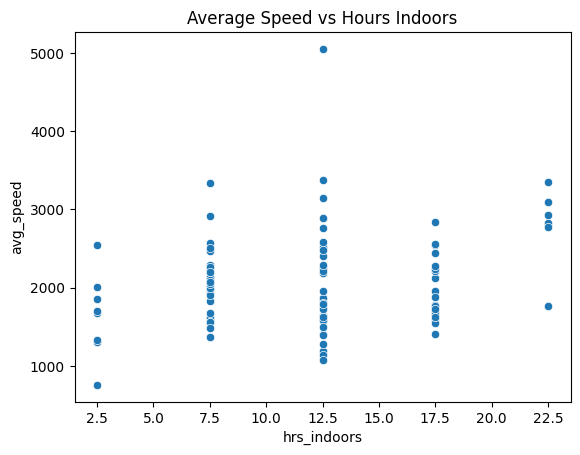

In [ ]:
sns.scatterplot(data=cat_merge, x="hrs_indoors", y="avg_speed")
plt.title("Average Speed vs Hours Indoors")
plt.show()


The scatter plot shows there is no strong linear relationship between hours spent indoors and average speed. However, variabilty within each in-door time group suggests that cats with simliar indoor-outdoor exposure can present totally different movement behaviors.

#Questions:



*  Are there cats whose movement patterns differ substantially from typical movement behavior across the population?
*  Do hourly movement patterns reveal distinct daily activity behavior clusters among cats, such as nocturnal or diurnal?
*  Do cats exhibit routine-driven versus more irregular movement patterns over time?

*  Does reproduction condition meaningfully relate to cats' movement behavior, and can it be used as a useful dimension for behavioral segmentation?







